In [ ]:
__author__ = "Pujun Bhatnagar"
__version__ = "Stanford, Spring 2016"

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


from __future__ import division, print_function, absolute_import
import json
from pprint import pprint
import pickle
import tflearn
from tflearn.data_utils import to_categorical, pad_sequences
from tflearn.datasets import imdb
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import math
import csv
import numpy as np
import openpyxl as px
import numpy as np

import os
import sys
import csv
import random
import itertools
from operator import itemgetter
from collections import defaultdict
import numpy as np
import scipy
import scipy.spatial.distance
from numpy.linalg import svd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import utils


In [6]:
import pickle
lstm_vocab = pickle.load(open('/home/pujun/Desktop/StanfordClasses/icgauge/data/lstm_vocab', 'rb'))
lstm_vocab_list = lstm_vocab.items()
lstm_vocab_list = sorted(lstm_vocab_list, key=lambda tup: tup[1])



In [4]:
num_words_in_longest_sentence = 512
word_count = len(lstm_vocab_list)
layer_input = tflearn.input_data([None, num_words_in_longest_sentence])
embedding = tflearn.embedding(layer_input, input_dim=word_count, output_dim=128)
lstm = tflearn.lstm(embedding, 128)
dropout = tflearn.dropout(lstm, 0.5)
softmax = tflearn.fully_connected(dropout, 2, activation='softmax')
net = tflearn.regression(softmax, optimizer='adam',
                       loss='categorical_crossentropy')

In [5]:
model = tflearn.DNN(softmax)

In [7]:
print(len(lstm_vocab_list))

24318


In [8]:
model.load("/home/pujun/Desktop/StanfordClasses/icgauge/data/LSTM_models/SNLI_SICK_custom_embedding/SNLI_SICK_custom_embedding")


In [9]:
embedding_var = tflearn.get_layer_variables_by_name('Embedding')[0]

In [10]:
type(embedding_var)

In [11]:
mat = model.get_weights(embedding_var)

In [16]:
rownames = lstm_vocab_list

In [17]:
indices = list(range(len(rownames)))

In [18]:
colors = ['black' for i in indices]

In [20]:
n_components = 50 if mat.shape[1] >= 50 else mat.shape[1]

In [21]:
dimreduce = PCA(n_components=n_components)

In [22]:
mat = dimreduce.fit_transform(mat)

In [23]:
mat.shape

In [24]:
tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True) 

In [25]:
tsnemat = tsne.fit_transform(mat)

In [26]:
tsnemat = pickle.load(open('/home/pujun/Desktop/StanfordClasses/icgauge/data/tsnemat.p', 'rb'))

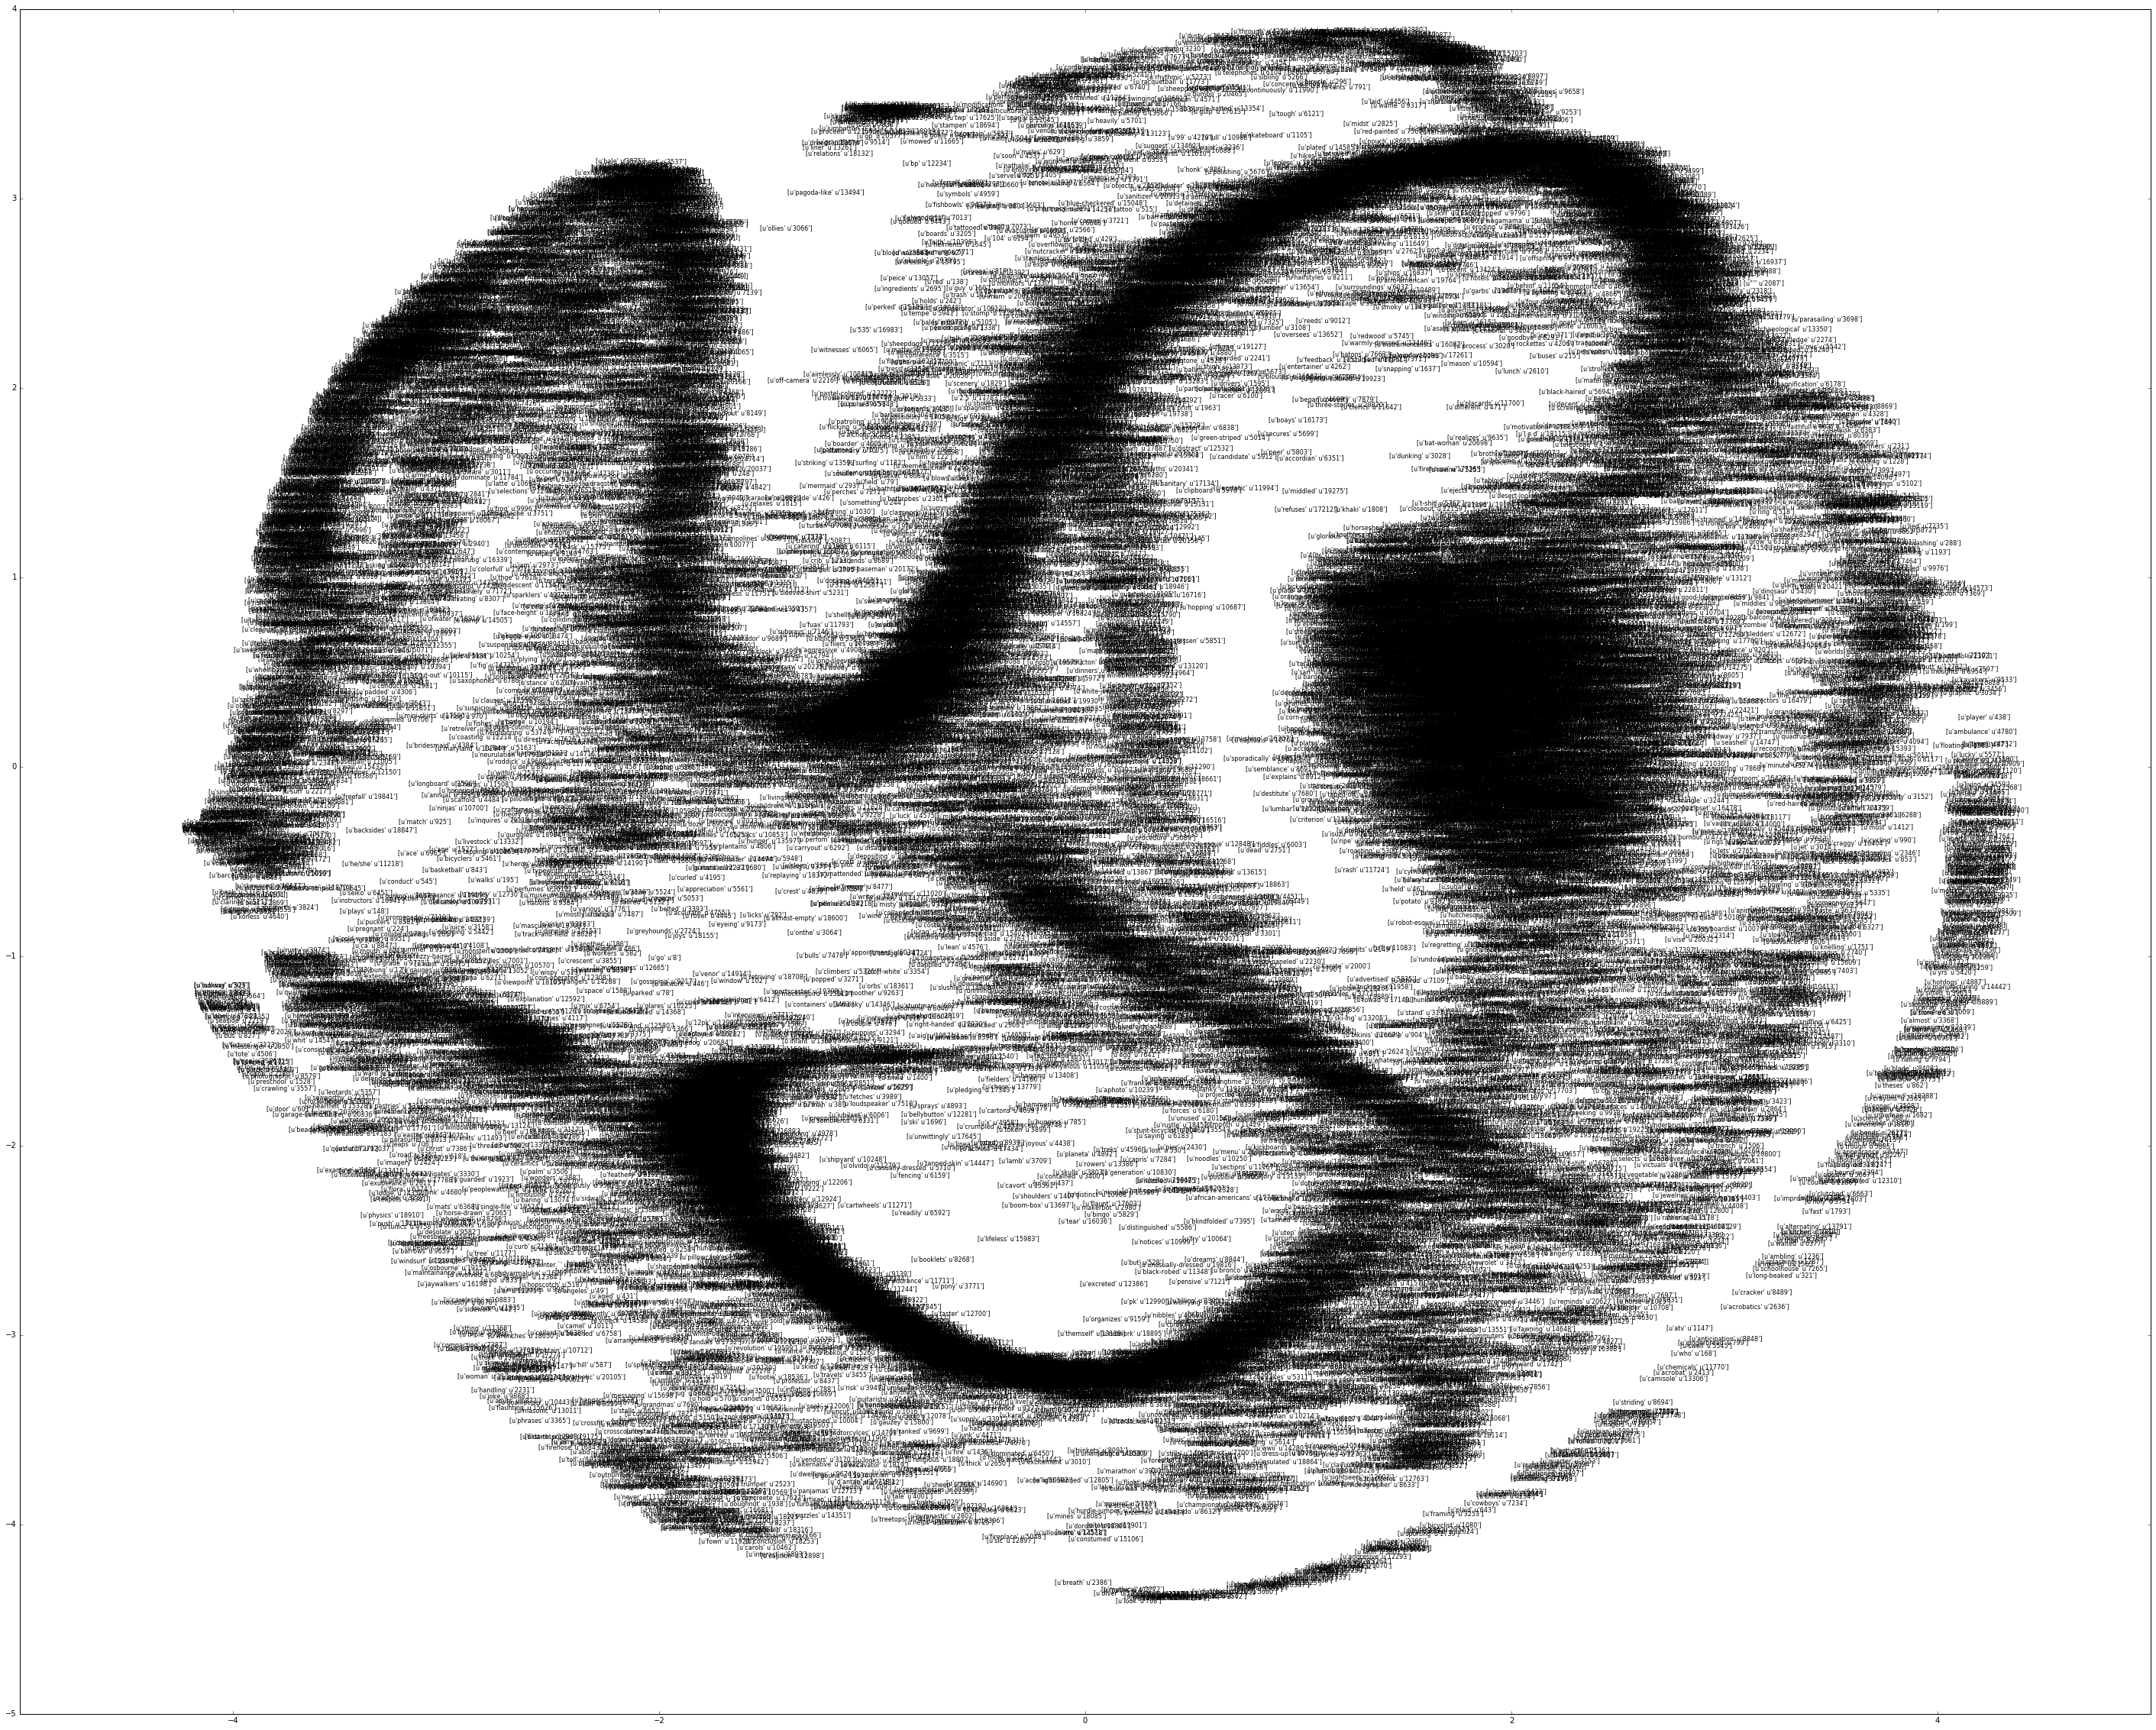

In [27]:
vocab = np.array(rownames)[indices]
xvals = tsnemat[indices, 0] 
yvals = tsnemat[indices, 1]
# Plotting:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(40)
fig.set_figwidth(50)
ax.plot(xvals, yvals, marker='', linestyle='')
# Text labels:
for word, x, y, color in zip(vocab, xvals, yvals, colors):
    ax.annotate(word, (x, y), fontsize=8, color=color)

plt.show()